# Import modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize

import os, glob

import nibabel as nib
from tqdm import trange
import tensorflow as tf

In [ ]:
testingNum = 14 #21
valNum = 44 #42
trainingNum = 82 #77

os.chdir("I:/JNB_python_projects/MLP(2021_1)/dataset/original")

testingCnt = 0
for i in range(testingNum):
    proxy = nib.load('volume-%d.nii.gz'%(i)) # for Training and Testing images
    arr = proxy.get_fdata()
    axial_cnt = arr.shape[-1]
    print("(Testing) %d th patient slice count : "%(i),axial_cnt)
    testingCnt += axial_cnt
print("(Testing) overall counts : ", testingCnt)
    
valCnt = 0
for i in range(testingNum, testingNum+valNum):
    proxy = nib.load('volume-%d.nii.gz'%(i)) # for Training and Testing images
    arr = proxy.get_fdata()
    axial_cnt = arr.shape[-1]
    print("(Validation) %d th patient slice count : "%(i),axial_cnt)
    valCnt += axial_cnt
print("(Validation) overall counts : ", valCnt)

trainCnt = 0    
for i in range(testingNum+valNum, testingNum+valNum+trainingNum):
    proxy = nib.load('volume-%d.nii.gz'%(i)) # for Training and Testing images
    arr = proxy.get_fdata()
    axial_cnt = arr.shape[-1]
    print("(Training) %d th patient slice count : "%(i),axial_cnt)
    trainCnt += axial_cnt
print("(Training) overall counts : ", trainCnt)
    

(Testing) 0 th patient slice count :  75
(Testing) 1 th patient slice count :  123
(Testing) 2 th patient slice count :  517
(Testing) 3 th patient slice count :  534
(Testing) 4 th patient slice count :  841
(Testing) 5 th patient slice count :  537
(Testing) 6 th patient slice count :  518
(Testing) 7 th patient slice count :  541
(Testing) 8 th patient slice count :  541
(Testing) 9 th patient slice count :  549
(Testing) 10 th patient slice count :  501
(Testing) 11 th patient slice count :  466
(Testing) 12 th patient slice count :  455
(Testing) 13 th patient slice count :  605
(Testing) overall counts :  6803
(Validation) 14 th patient slice count :  588
(Validation) 15 th patient slice count :  565
(Validation) 16 th patient slice count :  689
(Validation) 17 th patient slice count :  574
(Validation) 18 th patient slice count :  437
(Validation) 19 th patient slice count :  247
(Validation) 20 th patient slice count :  536
(Validation) 21 th patient slice count :  826
(Validat

# Load CT scans (training, validation) - nii files

In [3]:

'''
0: Background
1: Liver
2: Bladder
3: Lungs
4: Kidneys|
5: Bone
6: Brain
'''

# two channel (lung, liver)
target_label = 3
target_label2 = 1

startNum = 0
trainNum = 8 # 8 15
valNum = 2 # 2 5
#############################################################
    
train_img_list = []
val_img_list = []

train_mask_list = []
val_mask_list = []



# Training data


for i in trange(startNum+trainNum):
    os.chdir("I:/JNB_python_projects/MLP(2021_1)/dataset/original")
    proxy = nib.load('volume-%d.nii.gz'%(i)) # for Training and Testing images
    arr = proxy.get_fdata()
    axial_cnt = arr.shape[-1]
    header = proxy.header.get_zooms()
    print(header)
    
    #print("%d th voxel spacing : %f, %f"%(i, ))

    for j in range(axial_cnt):
        img = arr[:,:,j]
        img = np.rint(img)
        train_img_list.append(img)
        
    os.chdir("I:/JNB_python_projects/MLP(2021_1)/dataset/labeled")
    proxy_ = nib.load('labels-%d.nii.gz'%(i)) # for Training and Testing images
    arr_ = proxy_.get_fdata()
    axial_cnt_ = arr_.shape[-1]

    for j in range(axial_cnt_):
        img_ = arr_[:,:,j]
        img_ = np.rint(img_)
        
        mask_img_ = np.where(img_<target_label+0.5, 1.0, 0.0)
        mask_img__ = np.where(img_>target_label-0.5, 1.0, 0.0)
        mask_img = np.where(mask_img_==mask_img__, 1.0, 0.0)
        
        mask_img2_ = np.where(img_<target_label2+0.5, 1.0, 0.0)
        mask_img2__ = np.where(img_>target_label2-0.5, 1.0, 0.0)
        mask_img2 = np.where(mask_img2_==mask_img2__, 2.0, 0.0)
        
        mask_img = mask_img + mask_img2
        
        train_mask_list.append(mask_img)
        

        
        
# Validation data


for i in trange(trainNum, trainNum+valNum):
    os.chdir("I:/JNB_python_projects/MLP(2021_1)/dataset/original")
    proxy = nib.load('volume-%d.nii.gz'%(i)) # for Training and Testing images
    arr = proxy.get_fdata()
    axial_cnt = arr.shape[-1]

    for j in range(axial_cnt):
        img = arr[:,:,j]
        img = np.rint(img)
        val_img_list.append(img)
        
    os.chdir("I:/JNB_python_projects/MLP(2021_1)/dataset/labeled")
    proxy_ = nib.load('labels-%d.nii.gz'%(i)) # for Training and Testing images
    arr_ = proxy_.get_fdata()
    axial_cnt_ = arr_.shape[-1]

    for j in range(axial_cnt_):
        img_ = arr_[:,:,j]
        img_ = np.rint(img_)
        
        mask_img_ = np.where(img_<target_label+0.5, 1.0, 0.0)
        mask_img__ = np.where(img_>target_label-0.5, 1.0, 0.0)
        mask_img = np.where(mask_img_==mask_img__, 1.0, 0.0)
        
        mask_img2_ = np.where(img_<target_label2+0.5, 1.0, 0.0)
        mask_img2__ = np.where(img_>target_label2-0.5, 1.0, 0.0)
        mask_img2 = np.where(mask_img2_==mask_img2__, 2.0, 0.0)
        
        mask_img = mask_img + mask_img2
        
        val_mask_list.append(mask_img)

  0%|          | 0/8 [00:00<?, ?it/s]

(0.703125, 0.703125, 5.0)


 12%|█▎        | 1/8 [00:03<00:23,  3.32s/it]

(0.675781, 0.675781, 5.0)


 25%|██▌       | 2/8 [00:07<00:21,  3.53s/it]

(0.7753906, 0.7753906, 1.0)


 38%|███▊      | 3/8 [00:28<00:43,  8.68s/it]

(0.6933594, 0.6933594, 1.0)


 50%|█████     | 4/8 [00:48<00:49, 12.31s/it]

(0.902344, 0.902344, 0.8)


 62%|██████▎   | 5/8 [01:20<00:54, 18.12s/it]

(0.96875, 0.96875, 0.799988)


 75%|███████▌  | 6/8 [01:40<00:37, 18.83s/it]

(0.8730469, 0.8730469, 1.0)


 88%|████████▊ | 7/8 [02:02<00:19, 19.70s/it]

(0.7480469, 0.7480469, 1.0)


100%|██████████| 2/2 [00:47<00:00, 23.79s/it]


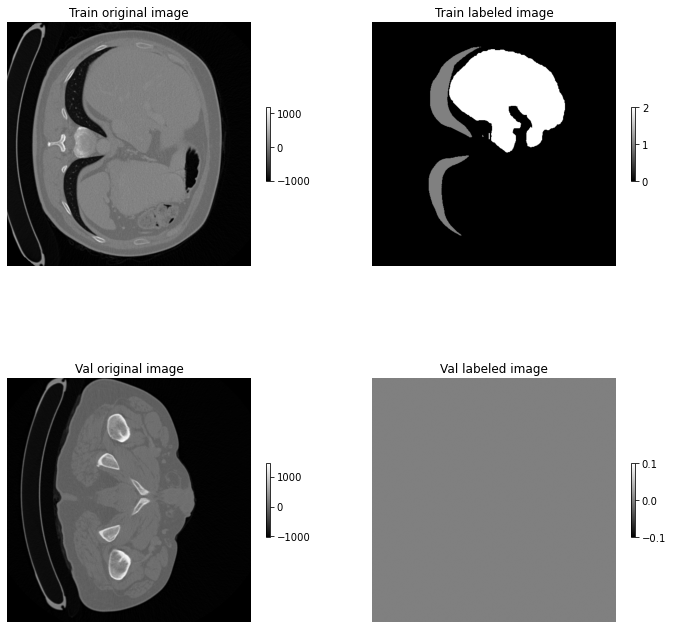

Train :  3686 3686
Val :  1090 1090


In [3]:
imgNum = 600

fig, ax = plt.subplots(2,2,figsize = [12,12])

ax[0,0].set_title("Train original image")
im0 = ax[0,0].imshow(train_img_list[imgNum], cmap = 'gray')
ax[0,0].axis('off')
fig.colorbar(im0, ax = ax[0,0], shrink = 0.25)


ax[0,1].set_title("Train labeled image")
im1 = ax[0,1].imshow(train_mask_list[imgNum], cmap = 'gray')
ax[0,1].axis('off')
fig.colorbar(im1, ax = ax[0,1], shrink = 0.25)


ax[1,0].set_title("Val original image")
im0 = ax[1,0].imshow(val_img_list[imgNum], cmap = 'gray')
ax[1,0].axis('off')
fig.colorbar(im0, ax = ax[1,0], shrink = 0.25)


ax[1,1].set_title("Val labeled image")
im1 = ax[1,1].imshow(val_mask_list[imgNum], cmap = 'gray')
ax[1,1].axis('off')
fig.colorbar(im1, ax = ax[1,1], shrink = 0.25)


plt.show()


print("Train : ", len(train_img_list), len(train_mask_list))
print("Val : ", len(val_img_list), len(val_mask_list))

In [4]:
print(train_img_list[0].shape)

(512, 512)


# Data preprocessing (resizing)

In [18]:
#IMG_SIZE = 512
IMG_SIZE = 256
#IMG_SIZE = 128
#IMG_SIZE = 64

#x_train_data, y_train_data = np.empty((2, len(train_img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
#x_val_data, y_val_data = np.empty((2, len(val_img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)

x_train_data= np.empty((len(train_img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
y_train_data = np.empty((len(train_img_list), IMG_SIZE, IMG_SIZE, 3), dtype=np.float32)
x_val_data= np.empty((len(val_img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
y_val_data = np.empty((len(val_img_list), IMG_SIZE, IMG_SIZE, 3), dtype=np.float32)

for i, img in enumerate(train_img_list):
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), order=0, preserve_range=True)
    x_train_data[i] = img
    
for i, img in enumerate(train_mask_list):
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), order=0, preserve_range=True)
    
    img_ = np.where(img>=0.5, 1.0, 0.0)
    img__ = np.where(img<=1.5, 1.0, 0.0)
    img1 = np.where(img_==img__, 1.0, 0.0)
    
    img2_ = np.where(img>=1.5, 1.0, 0.0)
    img2__ = np.where(img<=2.5, 1.0, 0.0)
    img2 = np.where(img2_==img2__, 2.0, 0.0)
    
    img = img1 + img2
    
    img = img.squeeze() # (256,256,1) -> (256,256)
    img = tf.keras.utils.to_categorical(img, 3) # one-hot encoding : (256,256) -> (256,256,3) 
    
    y_train_data[i] = img
    
for i, img in enumerate(val_img_list):
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), order=0, preserve_range=True)
    x_val_data[i] = img
    
for i, img in enumerate(val_mask_list):
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), order=0, preserve_range=True)
    
    img_ = np.where(img>=0.5, 1.0, 0.0)
    img__ = np.where(img<1.5, 1.0, 0.0)
    img1 = np.where(img_==img__, 1.0, 0.0)
    
    img2_ = np.where(img>=1.5, 1.0, 0.0)
    img2__ = np.where(img<2.5, 1.0, 0.0)
    img2 = np.where(img2_==img2__, 2.0, 0.0)
    
    img = img1 + img2
    
    img = img.squeeze() # (256,256,1) -> (256,256)
    img = tf.keras.utils.to_categorical(img, 3) # one-hot encoding : (256,256) -> (256,256,3) 
    
    y_val_data[i] = img




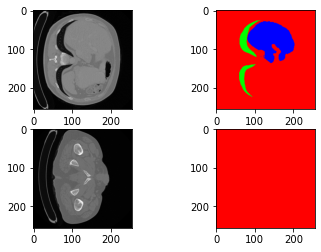

In [19]:
sliceNum = 600

fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(x_train_data[sliceNum].squeeze(), cmap='gray')
ax[0,1].imshow(y_train_data[sliceNum].squeeze(), cmap='gray')
ax[1,0].imshow(x_val_data[sliceNum].squeeze(), cmap='gray')
ax[1,1].imshow(y_val_data[sliceNum].squeeze(), cmap='gray')

# Save in npy format

In [20]:
os.chdir("I:/JNB_python_projects/MLP(2021_1)/dataset/npy_files")

np.save('x_256_lung_liver_train.npy', x_train_data)
np.save('y_256_lung_liver_train.npy', y_train_data)
np.save('x_256_lung_liver_val.npy', x_val_data)
np.save('y_256_lung_liver_val.npy', y_val_data)


print("(x_train, y_train) : ", x_train_data.shape, y_train_data.shape)
print("(x_val, y_val) : ", x_val_data.shape, y_val_data.shape)

(x_train, y_train) :  (3686, 256, 256, 1) (3686, 256, 256, 3)
(x_val, y_val) :  (1090, 256, 256, 1) (1090, 256, 256, 3)


# Testing data preprocessing

In [4]:
'''
0: Background
1: Liver
2: Bladder
3: Lungs
4: Kidneys
5: Bone
6: Brain
'''
target_label = 3
target_label2 = 1

test_num = 5


test_img_list = []
test_mask_img_list = []

    
for i in trange(trainNum+valNum, trainNum+valNum+test_num):
    os.chdir("I:/JNB_python_projects/MLP(2021_1)/dataset/original")
    proxy = nib.load('volume-%d.nii.gz'%(i)) # for Training and Testing images
    arr = proxy.get_fdata()
    axial_cnt = arr.shape[-1]
    header = proxy.header.get_zooms()
    print(header)

    for j in range(axial_cnt):
        img = arr[:,:,j]
        img = np.rint(img)
        test_img_list.append(img)
        
    os.chdir("I:/JNB_python_projects/MLP(2021_1)/dataset/labeled")
    proxy_ = nib.load('labels-%d.nii.gz'%(i)) # for Training and Testing images
    arr_ = proxy_.get_fdata()
    axial_cnt_ = arr_.shape[-1]

    for j in range(axial_cnt_):
        img_ = arr_[:,:,j]
        img_ = np.rint(img_)
        
        mask_img_ = np.where(img_<target_label+0.5, 1.0, 0.0)
        mask_img__ = np.where(img_>target_label-0.5, 1.0, 0.0)
        mask_img = np.where(mask_img_==mask_img__, 1.0, 0.0)
        
        mask_img2_ = np.where(img_<target_label2+0.5, 1.0, 0.0)
        mask_img2__ = np.where(img_>target_label2-0.5, 1.0, 0.0)
        mask_img2 = np.where(mask_img2_==mask_img2__, 2.0, 0.0)
        
        mask_img = mask_img + mask_img2
        
        test_mask_img_list.append(mask_img)

  0%|          | 0/5 [00:00<?, ?it/s]

(0.76953125, 0.76953125, 1.0)


 20%|██        | 1/5 [00:21<01:27, 21.93s/it]

(0.671875, 0.671875, 1.0)


 40%|████      | 2/5 [00:44<01:06, 22.13s/it]

(0.6542969, 0.6542969, 1.0)


 60%|██████    | 3/5 [01:02<00:41, 20.93s/it]

(0.84765625, 0.84765625, 1.0)


 80%|████████  | 4/5 [01:28<00:22, 22.33s/it]

(0.6855469, 0.6855469, 1.0)


100%|██████████| 5/5 [01:53<00:00, 22.63s/it]


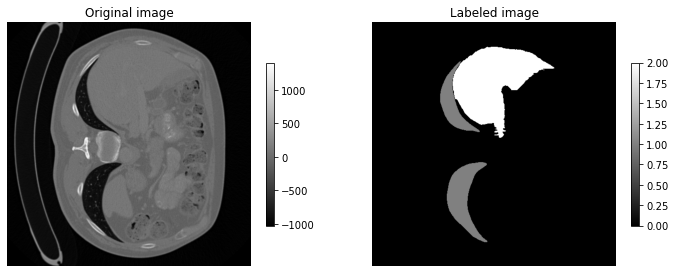

2615 2615


In [22]:
imgNum = 400

fig, ax = plt.subplots(1,2,figsize = [12,12])

ax[0].set_title("Original image")
im0 = ax[0].imshow(test_img_list[imgNum], cmap = 'gray')
ax[0].axis('off')
fig.colorbar(im0, ax = ax[0], shrink = 0.25)


ax[1].set_title("Labeled image")
im1 = ax[1].imshow(test_mask_img_list[imgNum], cmap = 'gray')
ax[1].axis('off')
fig.colorbar(im1, ax = ax[1], shrink = 0.25)
plt.show()

print(len(test_img_list), len(test_mask_img_list))

In [24]:
""" Resize """

#IMG_SIZE = 512
IMG_SIZE = 256
#IMG_SIZE = 128
#IMG_SIZE = 64

#x_test, y_test = np.empty((2, len(test_img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)

x_test = np.empty((len(test_img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
y_test = np.empty((len(test_img_list), IMG_SIZE, IMG_SIZE, 3), dtype=np.float32)

for i, img in enumerate(test_img_list):
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    x_test[i] = img

for i, img in enumerate(test_mask_img_list):
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    
    img_ = np.where(img>=0.5, 1.0, 0.0)
    img__ = np.where(img<1.5, 1.0, 0.0)
    img1 = np.where(img_==img__, 1.0, 0.0)
    
    img2_ = np.where(img>=1.5, 1.0, 0.0)
    img2__ = np.where(img<2.5, 1.0, 0.0)
    img2 = np.where(img2_==img2__, 2.0, 0.0)
    
    img = img1 + img2
    
    img = img.squeeze() # (256,256,1) -> (256,256)
    img = tf.keras.utils.to_categorical(img, 3) # one-hot encoding : (256,256) -> (256,256,3) 
    
    y_test[i] = img

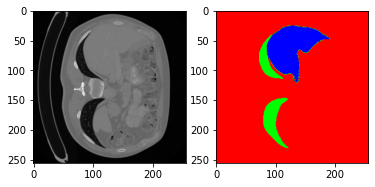

In [25]:
sliceNum =400
#test_= y_test[sliceNum].squeeze()

fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_test[sliceNum].squeeze(), cmap='gray')
ax[1].imshow(y_test[sliceNum].squeeze(), cmap='gray')

In [26]:
os.chdir("I:/JNB_python_projects/MLP(2021_1)/dataset/npy_files")

np.save('x_256_lung_liver_test.npy', x_test)
np.save('y_256_lung_liver_test.npy', y_test)


print(x_test.shape, y_test.shape)

(2615, 256, 256, 1) (2615, 256, 256, 3)


# Post-processing (Resizing)

In [ ]:
""" Resizing """

os.chdir("I:/JNB_python_projects/MLP(2021_1)/dataset")
y_test_predict = np.load('y_test_predict.npy')
y_test_gt = np.load('y_test_gt.npy')


col_size = y_test_gt.shape[0]
row_size = y_test_gt.shape[1]
height_size = y_test_gt.shape[-1]


IMG_SIZE = 512

test_gt_resized = np.zeros([IMG_SIZE, IMG_SIZE, height_size])
test_predict_resized = np.zeros([IMG_SIZE, IMG_SIZE, height_size])

for i in trange(height_size):
    img = y_test_gt[:,:,i]
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE), preserve_range=True)
    test_gt_resized[:,:,i] = img
    
    img2 = y_test_predict[:,:,i]
    img2 = resize(img2, output_shape=(IMG_SIZE, IMG_SIZE), preserve_range=True)
    test_predict_resized[:,:,i] = img2



sliceNum_ = 480
    
fig, ax = plt.subplots(1, 2)
ax[0].imshow(test_gt_resized[:,:,sliceNum_].squeeze(), cmap='gray')
ax[1].imshow(test_predict_resized[:,:,sliceNum_].squeeze(), cmap='gray')

In [ ]:
sliceNum_ = 500
    
fig, ax = plt.subplots(1, 2)
ax[0].imshow(test_gt_resized[:,:,sliceNum_].squeeze(), cmap='gray')
ax[1].imshow(test_predict_resized[:,:,sliceNum_].squeeze(), cmap='gray')

# Post-processing (PLT)

In [ ]:
reverse = True

os.chdir("I:/JNB_python_projects/MLP(2021_1)/dataset")

################################################
#y_test_predict = np.load('y_test_predict.npy')
#y_test_gt = np.load('y_test_gt.npy')

y_test_gt = test_gt_resized
y_test_predict = test_predict_resized
##############################################

col_size = y_test_predict.shape[0]
row_size = y_test_predict.shape[1]
height_size = y_test_predict.shape[-1]

print(col_size, row_size, height_size)


f = open("test_predict.plt",'w')

f.write("Variables = X, Y, Z, boundary\n")
data = "Zone I=%d, J=%d, K=%d, F=POINT\n"%(col_size, row_size, height_size)
f.write(data)

for i in trange(height_size):
    img = y_test_predict[:,:,i]
    
    for y in range(row_size):
        for x in range(col_size):
            node = img[y][x]

            if(reverse):
                data = "%d\t%d\t%d\t%d\n"%(x, y, height_size-1-i, node)

            else:
                data = "%d\t%d\t%d\t%d\n"%(x, y, i, node)
            f.write(data)



f.close()



f = open("test_gt.plt",'w')

f.write("Variables = X, Y, Z, boundary\n")
data = "Zone I=%d, J=%d, K=%d, F=POINT\n"%(col_size, row_size, height_size)
f.write(data)

for i in trange(height_size):
    img = y_test_gt[:,:,i]
    
    for y in range(row_size):
        for x in range(col_size):
            node = img[y][x]

            if(reverse):
                data = "%d\t%d\t%d\t%d\n"%(x, y, height_size-1-i, node)

            else:
                data = "%d\t%d\t%d\t%d\n"%(x, y, i, node)
            f.write(data)



f.close()